In [23]:
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from matplotlib.projections import get_projection_class
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mplsoccer.pitch import Pitch
import matplotlib
from highlight_text import  ax_text, fig_text

#Read in the data
df = pd.read_csv('Footballdata/UB/UB.csv', encoding='latin-1')

#Filter Pass
df=df[((df['type/value']==1) & (df['outcomeType/value']==1))]

#Angle Multiplier
multiplier = 2*np.pi/24

#Calculating Angle
def get_angle(val):
    x1, y1, x2, y2 = val
    dx = x2 - x1
    dy = y2 - y1
    result = np.arctan2(dy, dx)
    return result if result>=0 else result + 2*np.pi

df['length'] = np.sqrt(np.square(df["x"] - df["endX"]) + np.square(df["y"] - df["endY"]))
df['angle'] = df[['x', 'y', 'endX', 'endY']].apply(get_angle, axis=1)
df['angle_bin'] = pd.cut(df['angle'], bins=np.linspace(0, 2*np.pi, 20), right=True, labels=False)
pdf = df.groupby(['playername', 'angle_bin']).agg(count = ('angle_bin', 'count'), avg_length = ('length', 'mean')).reset_index()

In [24]:
#Locations of Players
player_loc_dict = { "Sheraldo Becker": (90, 70), 
                    "Jordan Siebatcheu" : (90, 30), 
                   
                    "Ivan Perisic" : (60, 90),
                    "Hakan Calhanoglu" : (60, 63.32), 
                    "Nicolò Barella" : (60, 36.66), 
                    "Matteo Darmian" : (60, 10),
                   
                    "Marcelo Brozovic" : (45, 50),
                   
                    "Diogo Leite" : (30, 85), 
                    "Robin Knoche" : (30, 50), 
                    "Paul Jaeckel": (30, 15),
                    "Samir Handanovic" : (10, 50),
                   
                    #Sub
                    "a" : (110,80),
                    "a" : (110,45),
                    "Alexis Sánchez" : (110,10),
                    "Joaquín Correa" : (125,80),
                    "Roberto Gagliardini" : (125,45),
                    "Arturo Vidal" : (125,10),                   
                  }

#Set cmap
cmap = plt.cm.get_cmap('cool')

#Insert function
def plot_inset(width, ax, pdf, x, y):
    ax_sub = inset_axes(ax, width=width, height=width, loc=10,
                       bbox_to_anchor=(x,y), bbox_transform=ax.transData, 
                       borderpad=0.0, axes_class=get_projection_class("polar"))
    colors = cmap(pdf['count']/pdf['count'].max())
    bars = ax_sub.bar(pdf['angle_bin']*multiplier, pdf['avg_length'], width=0.2, bottom=0, 
                      alpha=0.9, 
                      color=colors, zorder=3)
    ax_sub.set_xticklabels([])
    ax_sub.set_yticks([])
    ax_sub.grid(False)
    ax_sub.spines['polar'].set_visible(False)
    ax_sub.patch.set_alpha(0)
    return ax

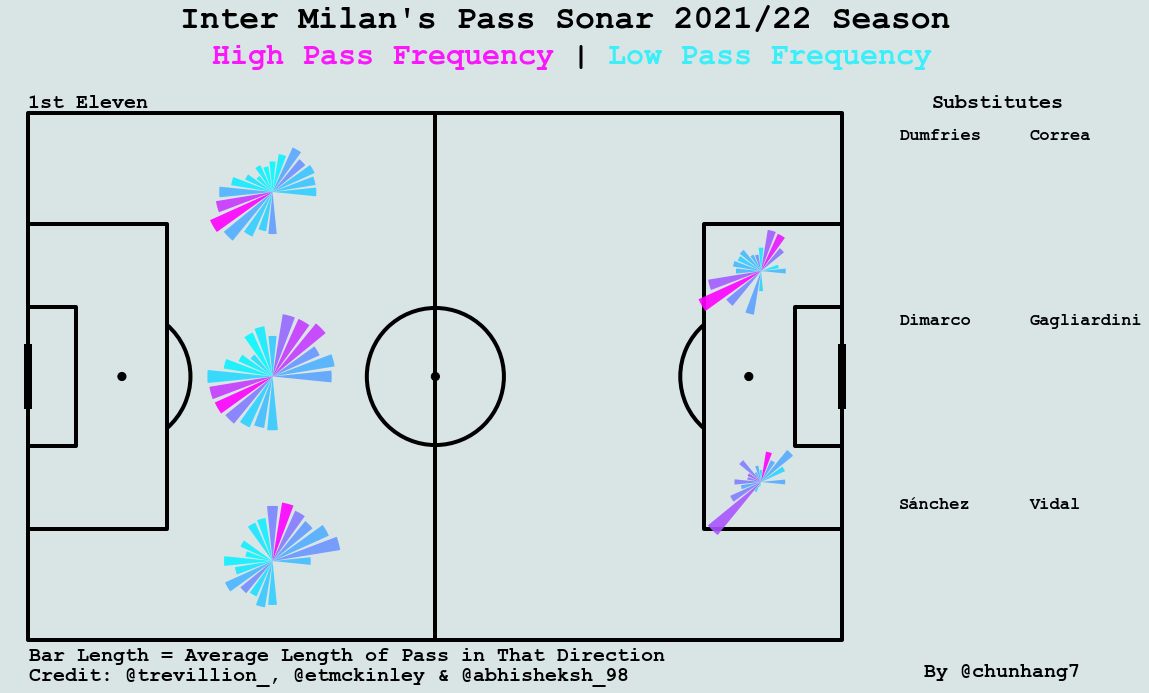

In [25]:
#Make the pitch
pitch = Pitch(pitch_type='opta', pitch_color='#d9e5e5', line_color='black',linewidth=4, spot_scale=0.005)
fig, ax = pitch.draw(figsize=(17, 13), constrained_layout=False, tight_layout=True)
fig.set_facecolor('#d9e5e5')

#Title
fig.suptitle("Inter Milan's Pass Sonar 2021/22 Season\n",fontsize=33, color='black',
            fontfamily = "Courier New", fontweight = "bold",y=0.86,x=0.15 ,ha='left')

highlight_textprops =\
    [{"color": "#fb17fc","fontweight": 'bold'},
     {"color": "#3ceef9","fontweight": 'bold'}
    ]

Title = fig_text(s = "<High Pass Frequency> | <Low Pass Frequency>" ,
        x = 0.47, y = 0.82, highlight_textprops = highlight_textprops ,color='black',
        fontfamily = "Courier New",fontweight='bold', ha='center',fontsize=30);

#Annotations
plt.text(0,101,"1st Eleven", fontsize=20, fontweight = "bold", fontfamily = "Courier New")
plt.text(111,101,"Substitutes", fontsize=20, fontweight = "bold", fontfamily = "Courier New")


"""#First Team
plt.text(9,57,"de Gea", fontsize=17, fontweight = "bold", fontfamily = "Courier New")
plt.text(37,26,"Wan-Bissaka", fontsize=17, fontweight = "bold", fontfamily = "Courier New")
plt.text(24,46,"Lindelöf", fontsize=17, fontweight = "bold", fontfamily = "Courier New")
plt.text(28,75,"Maguire", fontsize=17, fontweight = "bold", fontfamily = "Courier New")
plt.text(36,95,"Shaw", fontsize=17, fontweight = "bold", fontfamily = "Courier New")
plt.text(51,77,"McTominay", fontsize=17, fontweight = "bold", fontfamily = "Courier New")
plt.text(52,47,"Fred", fontsize=17, fontweight = "bold", fontfamily = "Courier New")
plt.text(73,91,"Sancho", fontsize=17, fontweight = "bold", fontfamily = "Courier New")
plt.text(71,61,"Fernandes", fontsize=17, fontweight = "bold", fontfamily = "Courier New")
plt.text(71,30,"Greenwood", fontsize=17, fontweight = "bold", fontfamily = "Courier New")
plt.text(85,60,"Ronaldo", fontsize=17, fontweight = "bold", fontfamily = "Courier New")"""

#Sub
plt.text(107,95,"Dumfries", fontsize=17, fontweight = "bold", fontfamily = "Courier New")
plt.text(107,60,"Dimarco", fontsize=17, fontweight = "bold", fontfamily = "Courier New")
plt.text(107,25,"Sánchez", fontsize=17, fontweight = "bold", fontfamily = "Courier New")
plt.text(123,95,"Correa", fontsize=17, fontweight = "bold", fontfamily = "Courier New")
plt.text(123,60,"Gagliardini", fontsize=17, fontweight = "bold", fontfamily = "Courier New")
plt.text(123,25,"Vidal", fontsize=17, fontweight = "bold", fontfamily = "Courier New")


#Plotting the angles
for playername, (x,y) in player_loc_dict.items():
    player_df = pdf.query("playername == @playername")
    plot_inset(2, ax, player_df, x, y)

#Credits
ax.text(0.1, -5, 'Bar Length = Average Length of Pass in That Direction\nCredit: @trevillion_, @etmckinley & @abhisheksh_98',
        va='center', ha='left', fontsize=20, color='black',
        fontweight = "bold",fontfamily = "Courier New")

ax.text(110, -6, 'By @chunhang7', va='center', ha='left', fontsize=20, color='black',
        fontweight = "bold",fontfamily = "Courier New")

plt.show()